In [1]:
import pandas as pd

In [59]:
df = pd.read_csv('airports.csv')

In [69]:
index = df[(df['STATE'] == 'HI') | (df['STATE'] == 'GU') | (df['STATE'] == 'AK') | (df['STATE'] == 'PR') | (df['STATE'] == 'AS') | (df['STATE'] == 'VI') | (df['COUNTRY'] != 'USA')].index
df.drop(index, inplace=True)
df = df.reset_index()

In [171]:
coords = zip(list(df['LATITUDE']), list(df['LONGITUDE']))

In [172]:
import numpy as np
df['RATING'] = pd.Series(np.random.randint(5, size=309))

In [173]:
import scipy.ndimage as ndimage

In [174]:
pd.Series(np.random.randn(309))
noise = ndimage.gaussian_filter(np.random.random(), sigma=1.0)

In [175]:
noise

array(0.23722679)

In [176]:
print(max(df['LONGITUDE']))
print(min(df['LONGITUDE']))

print(max(df['LATITUDE']))
print(min(df['LATITUDE']))

-68.82813889
-124.2460278
48.79275
24.55611111


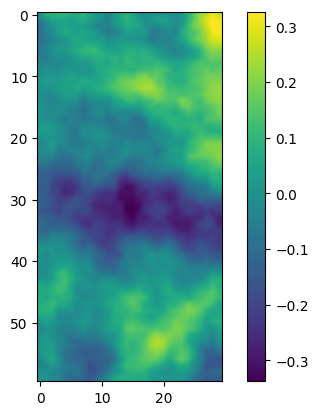

In [177]:
import noise
import numpy as np
import matplotlib.pyplot as plt

def generate_perlin_noise_map(width, height, scale, octaves, persistence, lacunarity, seed):
    np.random.seed(seed)

    # Generate a 2D grid of coordinates
    world = np.zeros((width, height))
    
    for i in range(width):
        for j in range(height):
            world[i][j] = noise.pnoise2(i/scale, 
                                        j/scale, 
                                        octaves=octaves, 
                                        persistence=persistence, 
                                        lacunarity=lacunarity, 
                                        repeatx=1024, 
                                        repeaty=1024, 
                                        base=seed)
    
    return world

# Set the parameters
width = 60
height = 30
scale = 20
octaves = 6
persistence = 0.5
lacunarity = 2.0
seed = 42

# Generate the Perlin noise map
perlin_map = generate_perlin_noise_map(width, height, scale, octaves, persistence, lacunarity, seed)

# Display the Perlin noise map using matplotlib
plt.imshow(perlin_map, cmap='viridis', interpolation='bilinear')
plt.colorbar()
plt.show()

In [178]:
np.max(perlin_map)

0.3264746367931366

In [179]:
ratings = []
for lat, long in coords:
    ratings.append((perlin_map[int(long) + 125][[int(lat) - 25]]))

In [180]:
for i, item in enumerate(ratings):
    ratings[i] = item.item()

In [181]:
len(ratings)

309

In [148]:
df['RATING']

,index,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,RATING
0,0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,1
1,2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,0
2,3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,4
3,4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,3
4,5,BHM,Birmingham International,Birmingham,AL,USA,33.562943,-86.753550,4
...,...,...,...,...,...,...,...,...,...
304,334,VLD,Valdosta Regional,Valdosta,GA,USA,30.782500,-83.276722,0
305,335,VPS,Eglin Air Force Base,Valparaiso,FL,USA,30.483250,-86.525400,0
306,337,WYS,Yellowstone,West Yellowstone,MT,USA,44.688399,-111.117638,0
307,338,XNA,Northwest Arkansas Regional,Fayetteville Springdale Rogers,AR,USA,36.281869,-94.306811,1


In [157]:
ratings = ratings * 20

In [182]:
def scale_values(values, new_min=0, new_max=5):
    # Calculate min and max of the original values
    min_value = min(values)
    max_value = max(values)

    # Scale each value
    scaled_values = [(value - min_value) / (max_value - min_value) * (new_max - new_min) + new_min for value in values]

    return scaled_values

# Example usage
scaled_values = scale_values(ratings)

print("Original Values:", ratings)
print("Scaled Values (0 to 5):", scaled_values)

Original Values: [0.0016435810830444098, -0.0037227212451398373, -0.24771706759929657, 0.11420685052871704, -0.056591615080833435, -0.16377586126327515, 0.15312501788139343, 0.06630026549100876, 0.07999305427074432, 0.09848340600728989, -0.021057991310954094, 0.04367838799953461, 0.006572420708835125, -0.050569355487823486, -0.04439418390393257, -0.18464843928813934, 0.09328709542751312, -0.011661875993013382, -0.15972724556922913, -0.0007084073731675744, -0.06690055131912231, 0.16408534348011017, 0.06135129928588867, -0.22194795310497284, 0.09328709542751312, -0.22194795310497284, -0.059187304228544235, 0.06713885068893433, 0.1338552087545395, 0.07970654219388962, 0.061980634927749634, 0.1338552087545395, -0.23619522154331207, -0.3334742784500122, 0.11005016416311264, -0.0669875293970108, -0.20502956211566925, 0.0634920671582222, -0.033042412251234055, -0.20431296527385712, -0.1019640788435936, -0.0520540326833725, -0.172377347946167, -0.298658549785614, 0.06272450089454651, -0.066987

In [183]:
len(scaled_values)

309

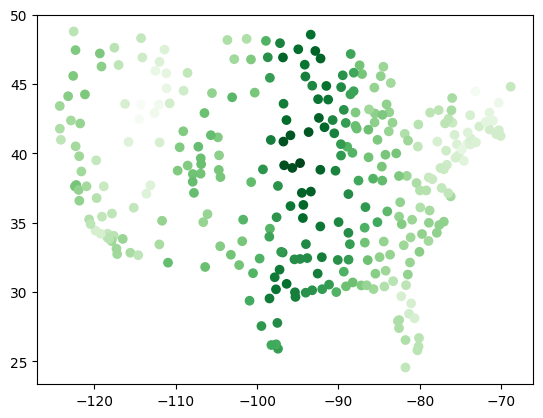

In [184]:
import matplotlib.pyplot as plt

plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=scaled_values, cmap='Greens_r')

In [187]:
df['RATING'] = pd.Series(scaled_values)

In [188]:
df

,index,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,RATING
0,0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.040222,-106.609194,2.988187
1,2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.640444,-84.426944,2.940337
2,3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.194533,-97.669872,0.764682
3,4,BDL,Bradley International,Windsor Locks,CT,USA,41.938874,-72.683228,3.991894
4,5,BHM,Birmingham International,Birmingham,AL,USA,33.562943,-86.753550,2.468914
...,...,...,...,...,...,...,...,...,...
304,334,VLD,Valdosta Regional,Valdosta,GA,USA,30.782500,-83.276722,3.498293
305,335,VPS,Eglin Air Force Base,Valparaiso,FL,USA,30.483250,-86.525400,2.988598
306,337,WYS,Yellowstone,West Yellowstone,MT,USA,44.688399,-111.117638,4.471069
307,338,XNA,Northwest Arkansas Regional,Fayetteville Springdale Rogers,AR,USA,36.281869,-94.306811,0.572751


In [190]:
df.to_csv()

",index,IATA,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,RATING\n0,0,ABQ,Albuquerque International,Albuquerque,NM,USA,35.04022222,-106.6091944,2.988187028865887\n1,2,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,33.64044444,-84.42694444,2.940336654575491\n2,3,AUS,Austin-Bergstrom International,Austin,TX,USA,30.19453278,-97.66987194,0.7646819702563407\n3,4,BDL,Bradley International,Windsor Locks,CT,USA,41.93887417,-72.68322833,3.9918939102388133\n4,5,BHM,Birmingham International,Birmingham,AL,USA,33.56294306,-86.75354972,2.468914024309128\n5,6,BNA,Nashville International,Nashville,TN,USA,36.12447667,-86.67818222,1.513170947567655\n6,7,BOS,Gen Edw L Logan Intl,Boston,MA,USA,42.3643475,-71.00517917,4.338920365446366\n7,8,BUF,Buffalo Niagara Intl,Buffalo,NY,USA,42.94052472,-78.73216667,3.564719314989229\n8,9,BUR,Burbank-Glendale-Pasadena,Burbank,CA,USA,34.20061917,-118.3584969,3.686815504901692\n9,10,BWI,Baltimore-Washington International,Baltimore,MD,USA,39.17540167,-76.66819833,

In [195]:
df = df.drop(columns=['index', 'IATA', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY'])

In [197]:
df.to_csv('./coords.csv', index=False)

In [198]:
df2 = df.drop(columns=['RATING'])

In [201]:
df2.to_csv('./coords_noratingnormal.csv', index=False)

In [204]:
df2['extra'] = ''

In [205]:
df2

,LATITUDE,LONGITUDE,extra
0,35.040222,-106.609194,
1,33.640444,-84.426944,
2,30.194533,-97.669872,
3,41.938874,-72.683228,
4,33.562943,-86.753550,
...,...,...,...
304,30.782500,-83.276722,
305,30.483250,-86.525400,
306,44.688399,-111.117638,
307,36.281869,-94.306811,


In [218]:
longs = (list(df['LONGITUDE'] + 130))

In [222]:
longsbig = list(np.array(longs) * 17)

In [223]:
latsbig = list(np.array(list(df['LATITUDE'])) * 17)

In [228]:
latsbigflip = -np.array(latsbig) + 900

In [231]:
latsbigflip = list(latsbigflip)

In [232]:
df2['LATITUDE'] = pd.Series(latsbigflip)

In [233]:
df2['LONGITUDE'] = pd.Series(longsbig)

In [240]:
order = ['LONGITUDE', 'LATITUDE', 'extra']
df2 = df2[order]

In [241]:
df2.to_csv('./coords_noratingscaled.csv', index=False)